<a href="https://colab.research.google.com/github/flohmannjr/PJI410/blob/main/PJI410_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PJI410 - Análise

In [1]:
# # Instalar pt_BR
# !/usr/share/locales/install-language-pack pt_BR
# !dpkg-reconfigure locales

# import os

# # Reiniciar o Python
# os.kill(os.getpid(), 9)

# Importações

In [11]:
import numpy as np
import pandas as pd

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

import datetime, locale

# Configurações

In [3]:
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi']     = 100

# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style("darkgrid")

# locale.setlocale(locale.LC_ALL, 'pt_BR')

PALETA = 'summer_r'
CORES  = ['#007F66', '#339966', '#66B266', '#99CC66', '#CCE566']

DIAGNOSTICOS = {1: 'SRAG por Influenza',
                2: 'SRAG por outro vírus respiratório',
                3: 'SRAG por outro agente etiológico',
                4: 'SRAG não especificado',
                5: 'SRAG por COVID-19'}

ESCOLARIDADES = {0: 'Sem escolaridade / Analfabeto',
                 1: 'Fundamental 1º ciclo (1ª a 5ª série)',
                 2: 'Fundamental 2º ciclo (6ª a 9ª série)',
                 3: 'Médio (1º ao 3º ano)',
                 4: 'Superior'}

EVOLUCOES = {1: 'Cura',
             2: 'Óbito',
             3: 'Óbito por outras causas'}

RACAS = {1: 'Branca',
         2: 'Preta',
         3: 'Amarela',
         4: 'Parda',
         5: 'Indígena'}

SEXOS = {1: 'Masculino',
         2: 'Feminino'}

SINTOMAS = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA',
            'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'OUTRO_SIN']

ZONAS = {1: 'Urbana',
         2: 'Rural',
         3: 'Periurbana'}

# Dados

In [4]:
df_demora          = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_demora.csv', parse_dates=['Segunda-feira'])
df_diagnostico     = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_diagnostico.csv')
df_escolaridade    = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_escolaridade.csv', parse_dates=['Segunda-feira'])
df_evolucao        = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_evolucao.csv')
df_evolucao_prisin = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_evolucao_prisin.csv', parse_dates=['Segunda-feira'])
df_internacao      = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_internacao.csv', parse_dates=['Segunda-feira'])
df_obitos_covid    = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_obitos_covid.csv')
df_populacao       = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_populacao.csv')
df_raca            = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_raca.csv', parse_dates=['Segunda-feira'])
df_sintomas        = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_sintomas.zip')
df_uti             = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_uti.csv', parse_dates=['Segunda-feira'])
df_zona            = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_zona.csv', parse_dates=['Segunda-feira'])
df_sintomas_semana = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/PJI410/main/dados/PJI410_sintomas_semana.csv', parse_dates=['Segunda-feira'])

# Análise

## Notificações por 1000 habitantes por unidade federativa

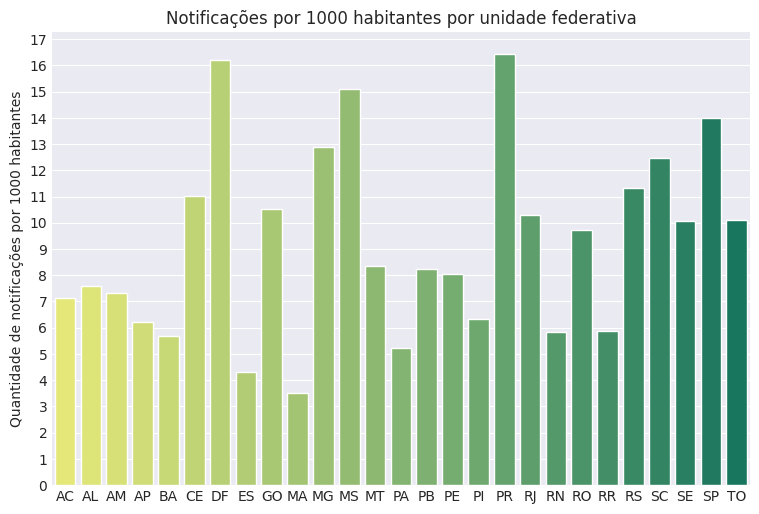

In [ ]:
sns.barplot(data=df_populacao, x='UF', y='NotPor1000Hab', palette=PALETA)

plt.title('Notificações por 1000 habitantes por unidade federativa')
plt.xlabel('')
plt.ylabel('Quantidade de notificações por 1000 habitantes')

plt.yticks(range(int(np.ceil(df_populacao['NotPor1000Hab'].max() + 1))));

## Evoluções por 1000 habitantes por unidade federativa

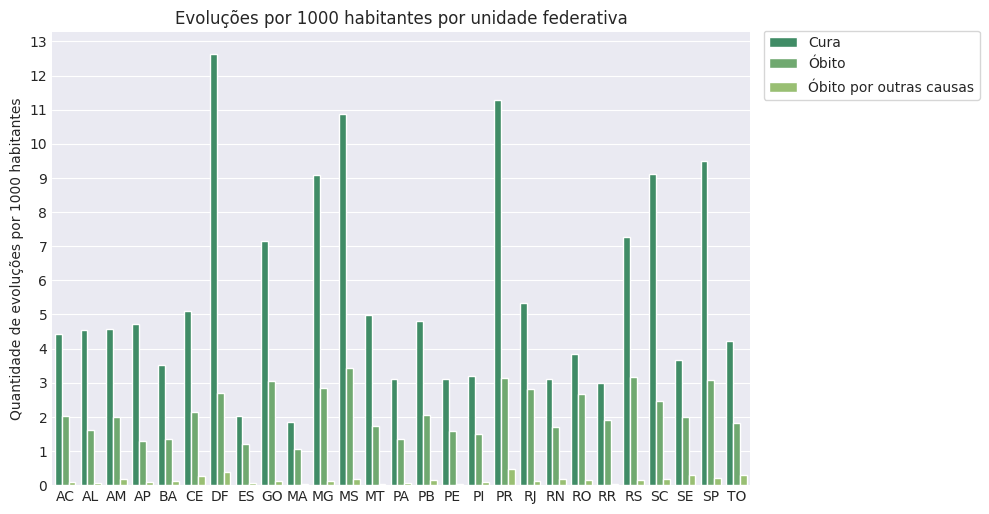

In [ ]:
ax = sns.barplot(data=df_evolucao, x='UF', y='Por1000Hab', hue='Evolucao', palette=CORES[1:])

plt.title('Evoluções por 1000 habitantes por unidade federativa')
plt.xlabel('')
plt.ylabel('Quantidade de evoluções por 1000 habitantes')

plt.yticks(range(int(np.ceil(df_evolucao['Por1000Hab'].max() + 1))))

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.85), frameon=True, facecolor='white', handles=handles, labels=EVOLUCOES.values());

## Óbitos por COVID-19 por 1000 habitantes por unidade federativa

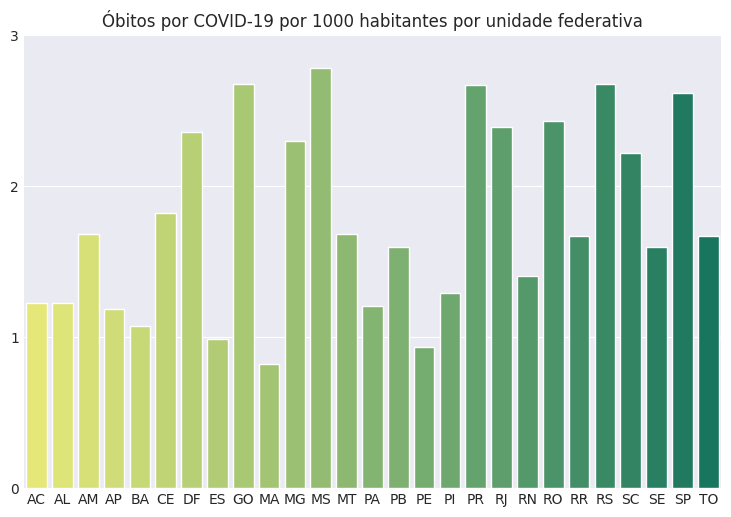

In [ ]:
sns.barplot(data=df_obitos_covid, x='UF', y='Por1000Hab', palette=PALETA)

plt.title('Óbitos por COVID-19 por 1000 habitantes por unidade federativa')
plt.xlabel('')
plt.ylabel('')

plt.yticks(range(int(np.ceil(df_obitos_covid['Por1000Hab'].max() + 1))));

## Diagnósticos finais por evolução

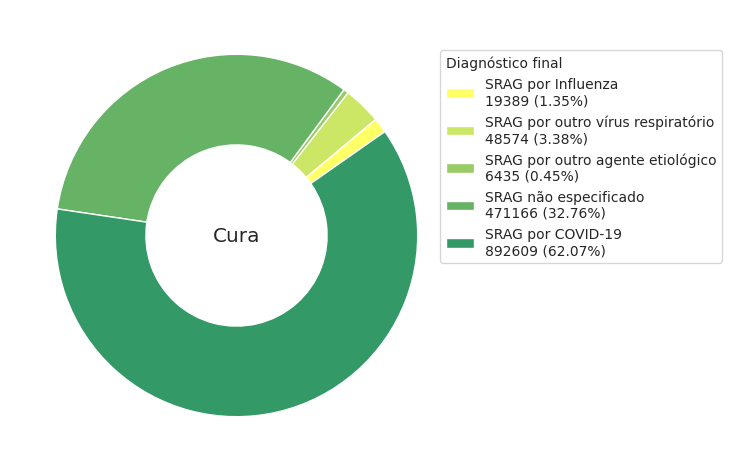

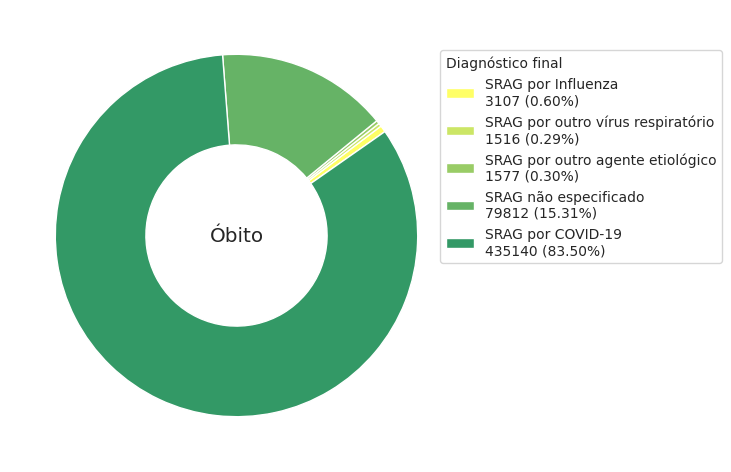

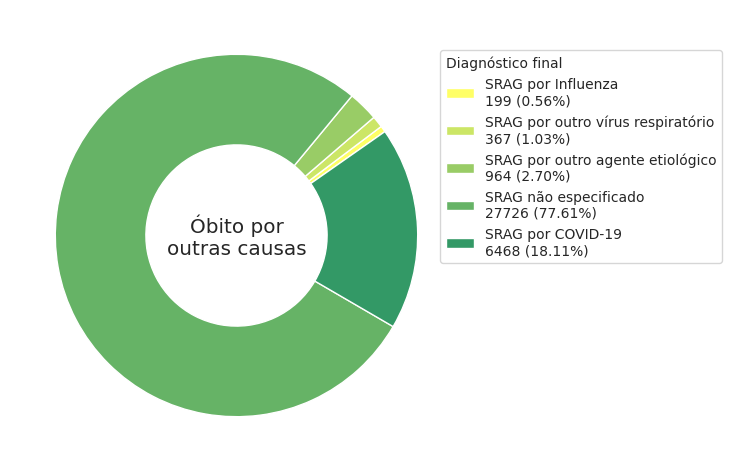

In [ ]:
for ev_cod, ev_desc in EVOLUCOES.items():

    dados    = df_diagnostico['Quantidade'][df_diagnostico['Evolucao'] == ev_cod].to_list()
    rotulos  = [f'{di}\n{da} ({((da / sum(dados)) * 100):0.2f}%)' for di, da in zip(DIAGNOSTICOS.values(), dados)]
    evolucao = ev_desc if (len(ev_desc.split()) == 1) else ('\n'.join([' '.join(m) for m in np.array_split(ev_desc.split(), 2)]))

    fig, ax = plt.subplots()

    ax.set_prop_cycle('color', [plt.get_cmap(PALETA)(1. * i / len(dados)) for i in range(len(dados))])
    ax.pie(dados, wedgeprops={'width': 0.5, 'edgecolor': 'w'}, startangle=35)
    ax.text(0, 0, evolucao, ha='center', va='center', fontsize='x-large')

    legenda = ax.legend(loc=(0.95, 0.44), frameon=True, facecolor='white', title='Diagnóstico final', labels=rotulos)
    legenda._legend_box.align = 'left'

    plt.show()

## Notificações por unidade federativa por sexo

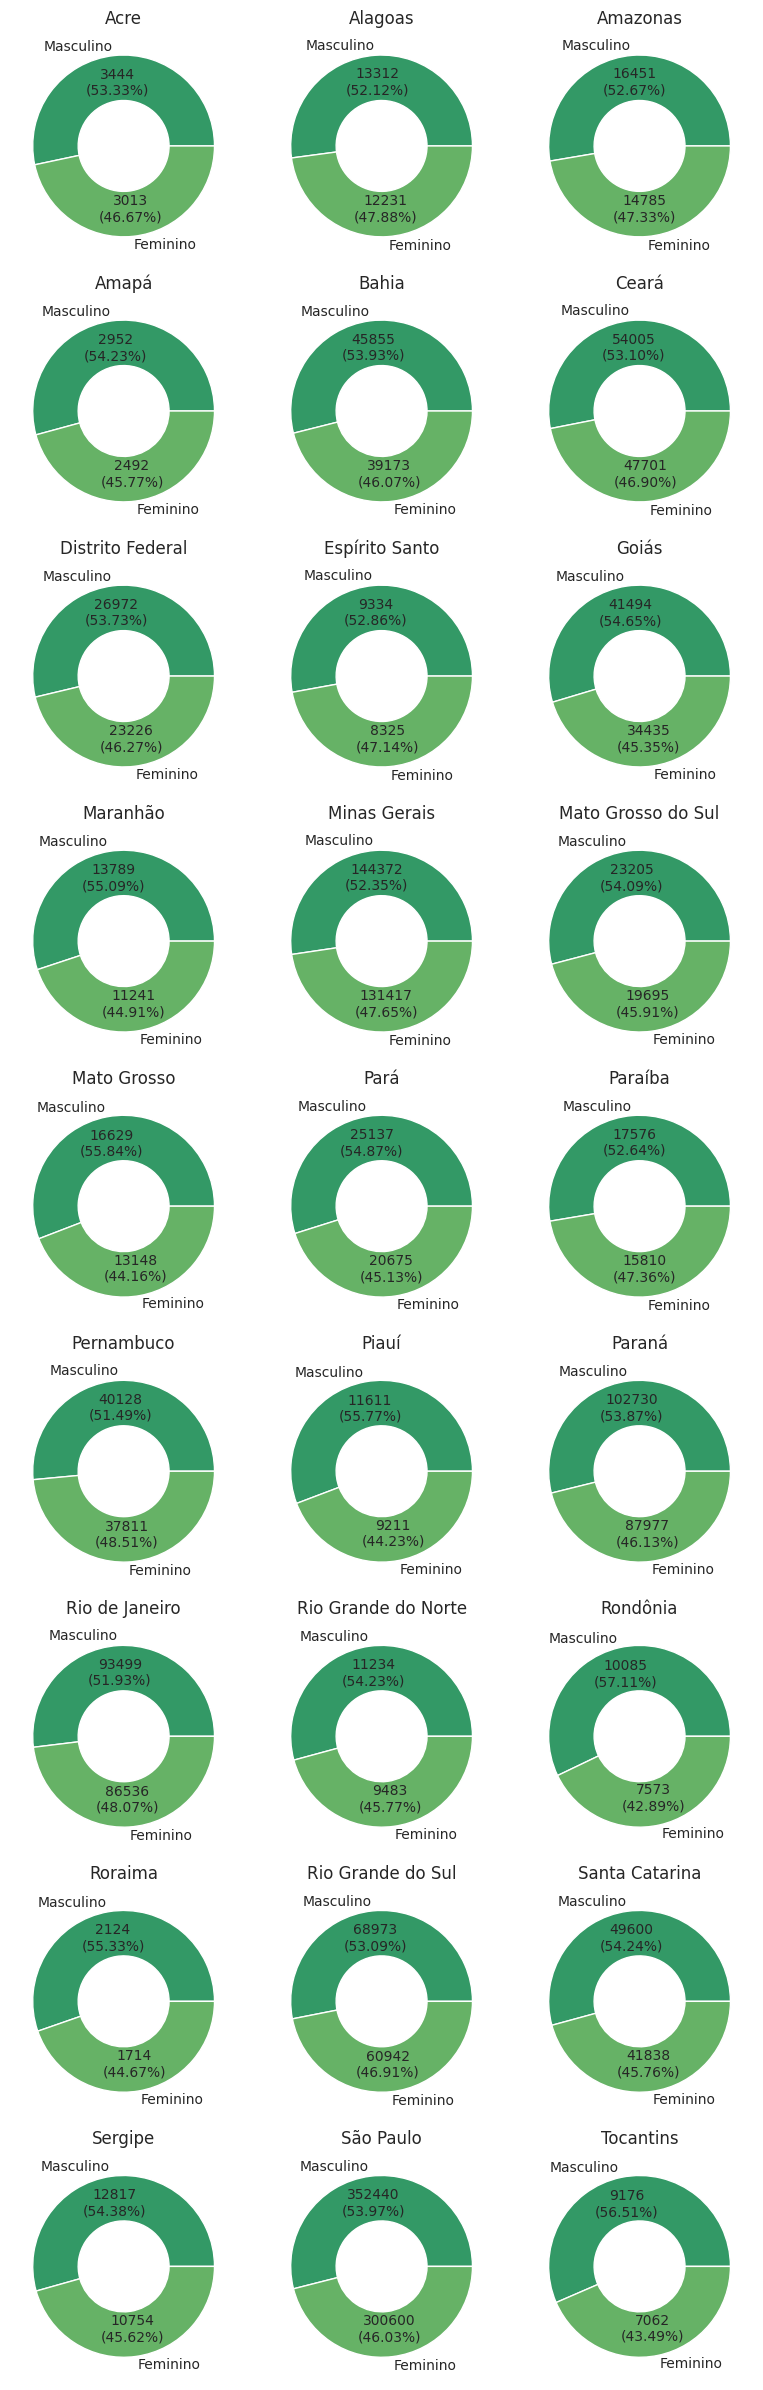

In [ ]:
colunas = 3
linhas  = int(np.ceil(len(df_populacao) / colunas))

fig, ax = plt.subplots(linhas, colunas, figsize=[8, 24])

def func(pct, dados):
    return f"{int(pct / 100 * np.sum(dados))}\n({pct:0.2f}%)"

for i, uf in df_populacao.iterrows():

    dados = uf[['NotMasculino', 'NotFeminino']]

    ax[i // colunas, i % colunas].pie(dados,
                                      labels=SEXOS.values(),
                                      autopct=lambda pct: func(pct, dados),
                                      pctdistance=0.7,
                                      wedgeprops={'width': 0.5,
                                                  'edgecolor': 'w'},
                                      colors=CORES[1:])

    ax[i // colunas, i % colunas].set_title(uf['Nome'])

plt.tight_layout()

## Diferença média de dias entre primeiros sintomas e notificação

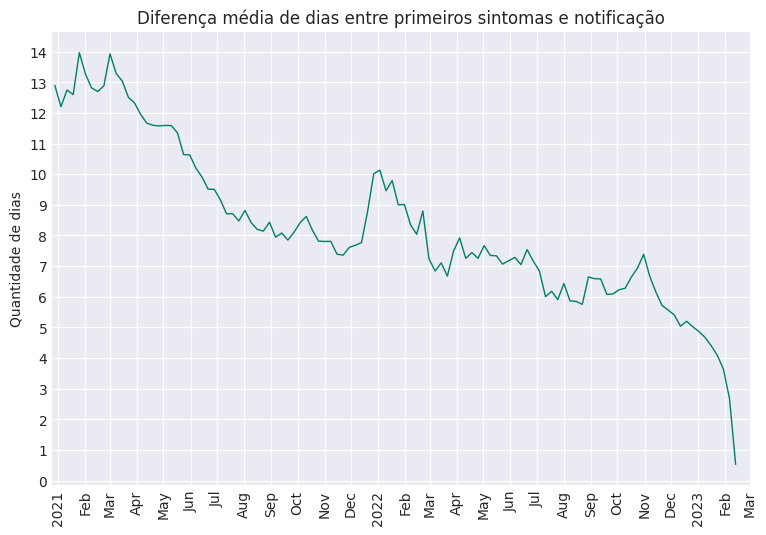

In [ ]:
ax = sns.lineplot(data=df_demora, x='Segunda-feira', y='Dias', linewidth=1, color=CORES[0])

plt.title('Diferença média de dias entre primeiros sintomas e notificação')
plt.xlabel('')
plt.ylabel('Quantidade de dias')

plt.xlim([datetime.date(2020, 12, 25), datetime.date(2023, 3, 1)])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

plt.yticks(range(int(np.ceil(df_demora['Dias'].max() + 1))))

plt.grid(visible=True, which='both', axis='both');

## Evoluções por semana de primeiros sintomas

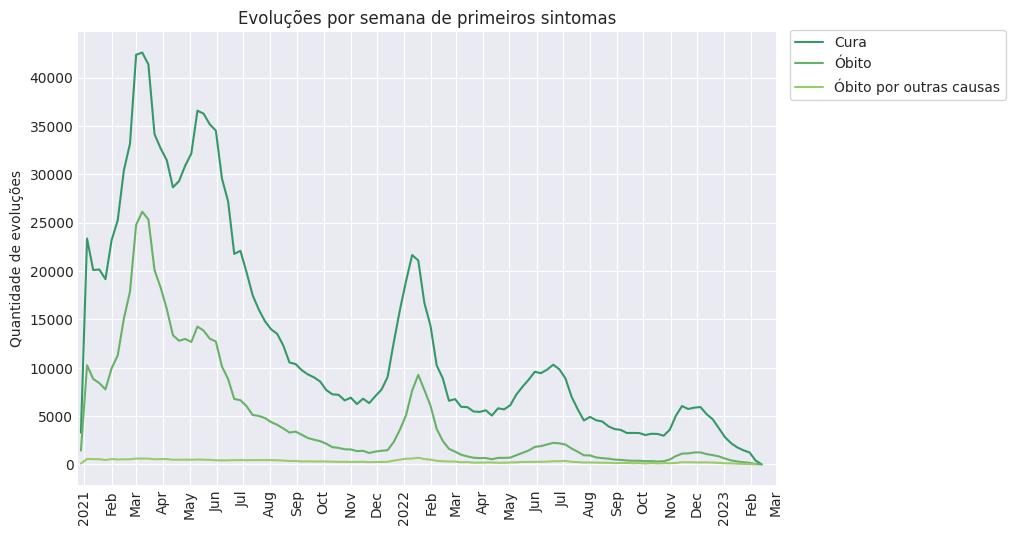

In [ ]:
ax = sns.lineplot(data=df_evolucao_prisin, x='Segunda-feira', y='Quantidade', hue='Evolucao', palette=CORES[1:len(EVOLUCOES) + 1])

plt.title('Evoluções por semana de primeiros sintomas')
plt.xlabel('')
plt.ylabel('Quantidade de evoluções')

plt.xlim([datetime.date(2020, 12, 25), datetime.date(2023, 3, 1)])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 5000

plt.yticks(np.arange(0, int(np.ceil(df_evolucao_prisin['Quantidade'].max() / ytick_step) * ytick_step), ytick_step))

plt.grid(visible=True, which='both', axis='both')

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.85), frameon=True, facecolor='white', handles=handles, labels=EVOLUCOES.values());

## Média de notificações por semana por raça

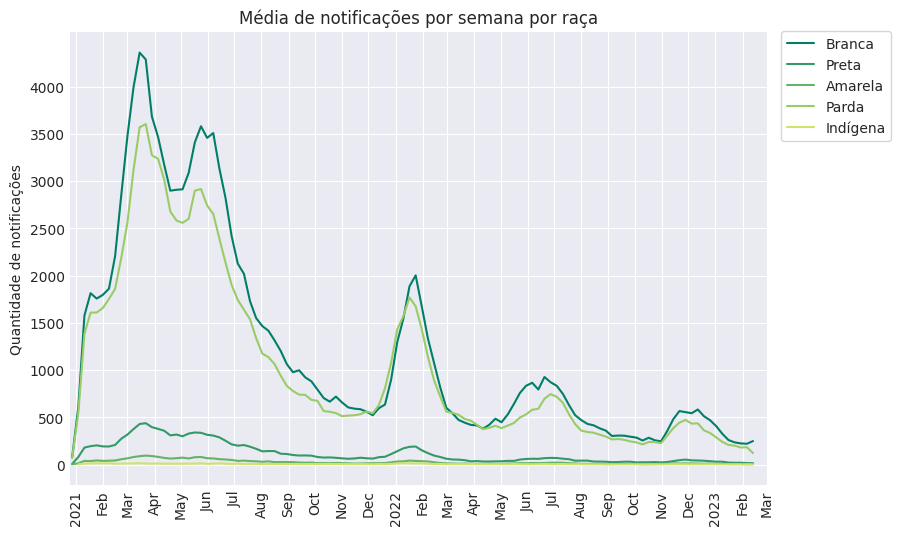

In [ ]:
ax = sns.lineplot(data=df_raca, x='Segunda-feira', y='Quantidade', hue='Raca', palette=CORES)

plt.title('Média de notificações por semana por raça')
plt.xlabel('')
plt.ylabel('Quantidade de notificações')

plt.xlim([datetime.date(2020, 12, 25), datetime.date(2023, 3, 1)])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 500

plt.yticks(np.arange(0, int(np.ceil(df_raca['Quantidade'].max() / ytick_step) * ytick_step), ytick_step))

plt.grid(visible=True, which='both', axis='both')

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.76), frameon=True, facecolor='white', handles=handles, labels=RACAS.values());

## Média de notificações por semana por escolaridade

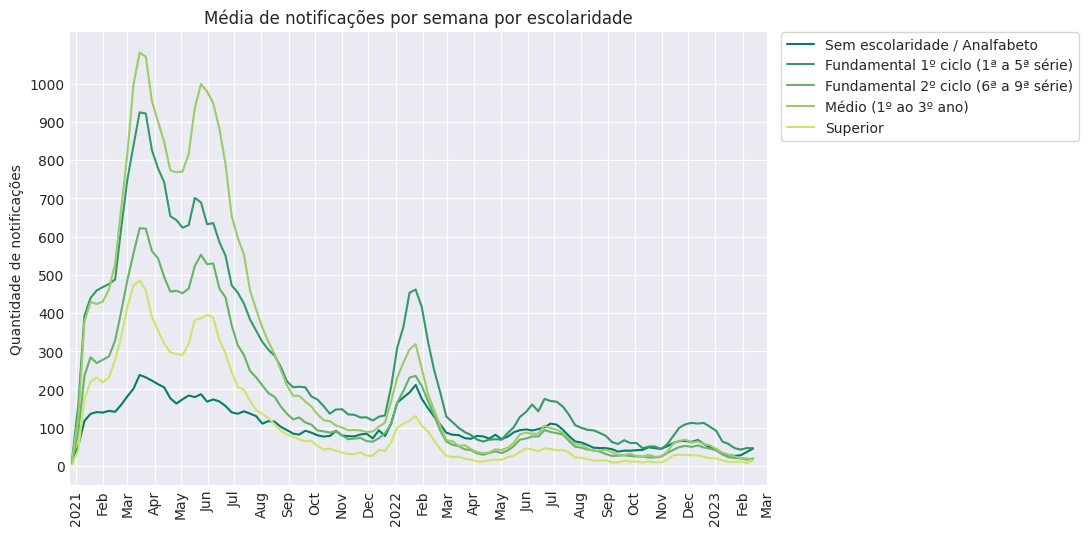

In [ ]:
ax = sns.lineplot(data=df_escolaridade, x='Segunda-feira', y='Quantidade', hue='Escolaridade', palette=CORES)

plt.title('Média de notificações por semana por escolaridade')
plt.xlabel('')
plt.ylabel('Quantidade de notificações')

plt.xlim([datetime.date(2020, 12, 25), datetime.date(2023, 3, 1)])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 100

plt.yticks(np.arange(0, int(np.ceil(df_escolaridade['Quantidade'].max() / ytick_step) * ytick_step), ytick_step))

plt.grid(visible=True, which='both', axis='both')

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.76), frameon=True, facecolor='white', handles=handles, labels=ESCOLARIDADES.values());

## Média de notificações por semana por zona

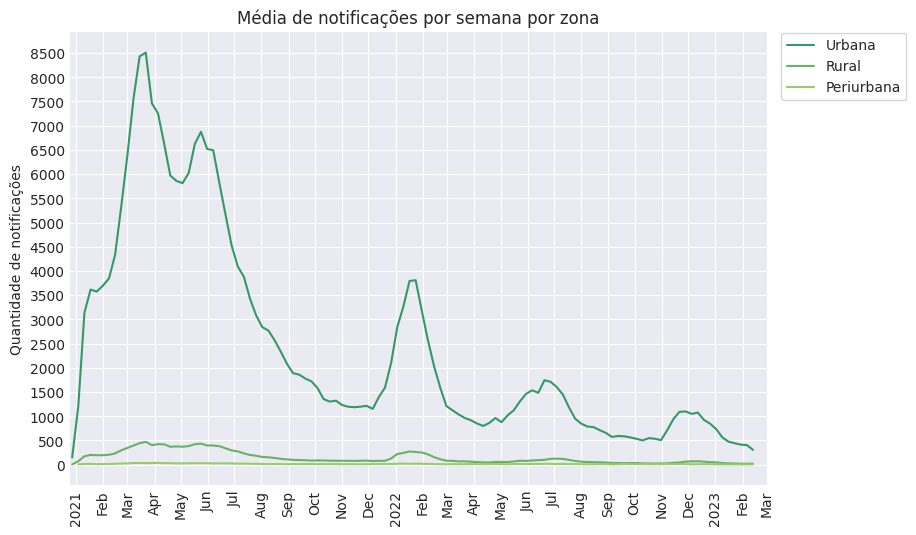

In [ ]:
ax = sns.lineplot(data=df_zona, x='Segunda-feira', y='Quantidade', hue='Zona', palette=CORES[1:len(ZONAS) + 1])

plt.title('Média de notificações por semana por zona')
plt.xlabel('')
plt.ylabel('Quantidade de notificações')

plt.xlim([datetime.date(2020, 12, 25), datetime.date(2023, 3, 1)])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 500

plt.yticks(np.arange(0, int(np.ceil(df_zona['Quantidade'].max() / ytick_step) * ytick_step), ytick_step))

plt.grid(visible=True, which='both', axis='both')

handles, _ = ax.get_legend_handles_labels()

plt.legend(loc=(1.02, 0.85), frameon=True, facecolor='white', handles=handles, labels=ZONAS.values());

## Média de dias hospitalizado ou internado em UTI

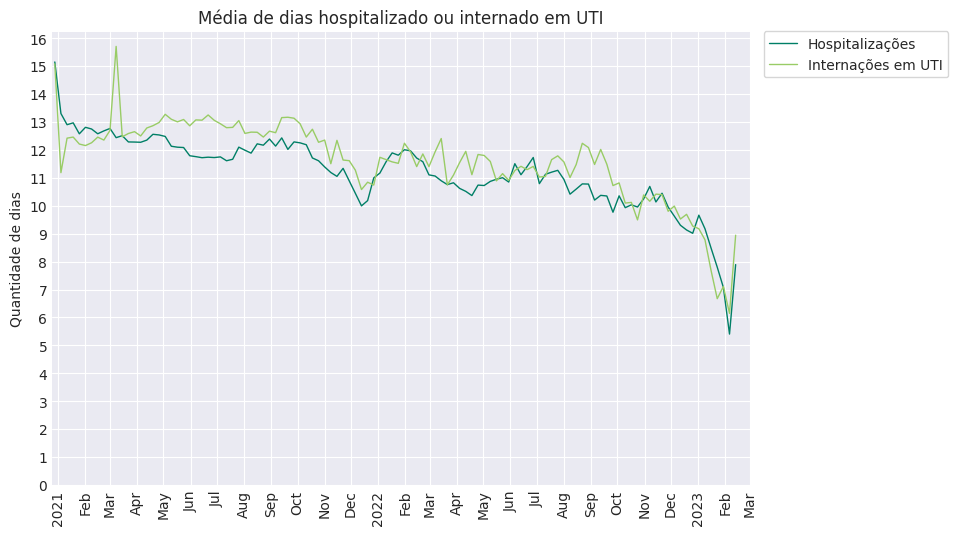

In [ ]:
ax = sns.lineplot(data=df_internacao, x='Segunda-feira', y='Dias', linewidth=1, color=CORES[0], label='Hospitalizações')
sns.lineplot(data=df_uti, x='Segunda-feira', y='Dias', linewidth=1, color=CORES[3], label='Internações em UTI')

plt.title('Média de dias hospitalizado ou internado em UTI')
plt.xlabel('')
plt.ylabel('Quantidade de dias')

plt.xlim([datetime.date(2020, 12, 25), datetime.date(2023, 3, 1)])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

# plt.yticks(range(int(np.floor(min(df_internacao['Dias'].min(), df_uti['Dias'].min()) - 1)),
#                  int(np.ceil(max(df_internacao['Dias'].max(), df_uti['Dias'].max()) + 1))))

plt.yticks(range(int(np.ceil(max(df_internacao['Dias'].max(), df_uti['Dias'].max()) + 1))))

plt.grid(visible=True, which='both', axis='both')

plt.legend(loc=(1.02, 0.9), frameon=True, facecolor='white');

## Presença de sintomas em notificações por semana

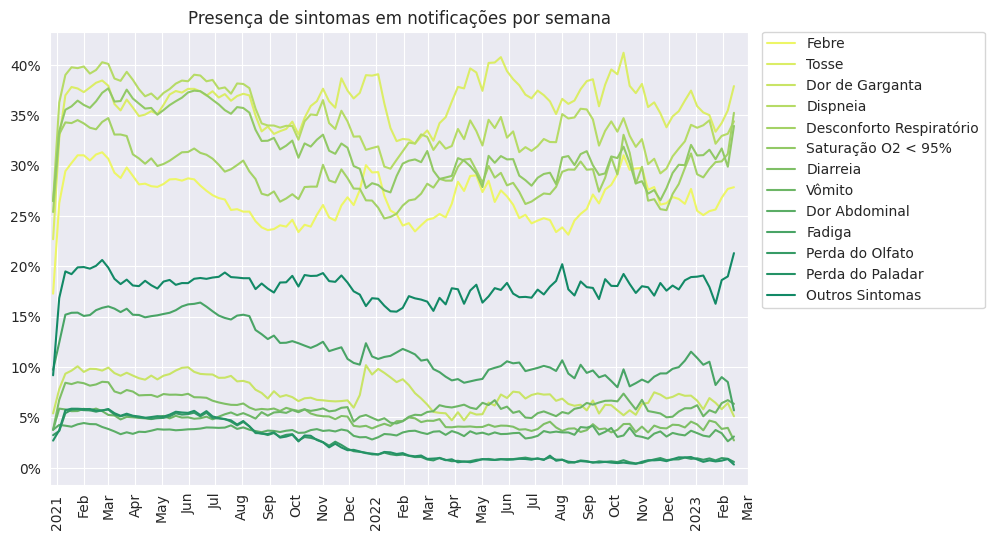

In [22]:
ax = sns.lineplot(data=df_sintomas_semana, x='Segunda-feira', y='Presença', hue='Sintoma', palette=PALETA)

plt.title('Presença de sintomas em notificações por semana')
plt.xlabel('')
plt.ylabel('')

plt.xlim([datetime.date(2020, 12, 25), datetime.date(2023, 3, 1)])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

for tick in ax.get_xticklabels(which='both'):
    tick.set_rotation(90)

ytick_step = 0.05
yticks     = np.arange(0, np.ceil(df_sintomas_semana['Presença'].max() / ytick_step) * ytick_step, ytick_step)

plt.yticks(ticks=yticks, labels=[f'{int(t * 100)}%' for t in yticks])

plt.grid(visible=True, which='both', axis='both')

plt.legend(loc=(1.02, 0.39), frameon=True, facecolor='white');

## Correlações entre sintomas

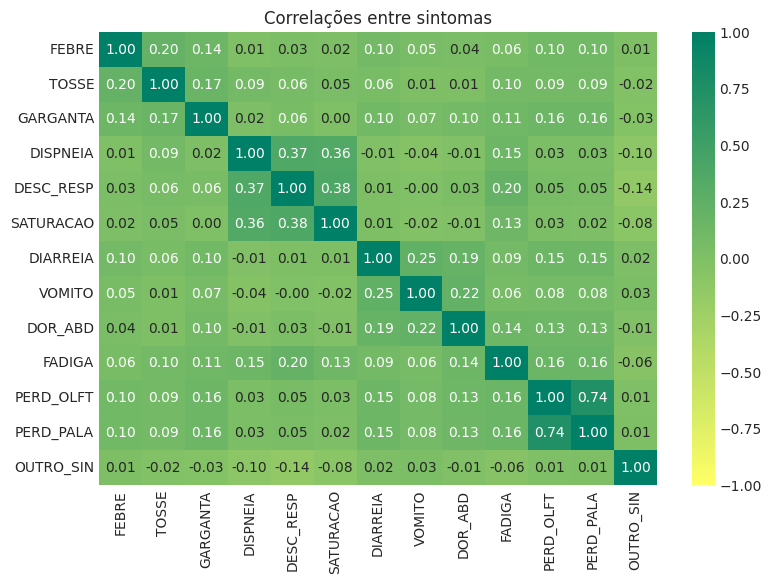

In [ ]:
sns.heatmap(data=df_sintomas[SINTOMAS].corr(), annot=True, fmt="0.2f", vmin=-1, vmax=1, cmap=PALETA)

plt.title('Correlações entre sintomas');